# Определение физической активности при помощи смартфона

Источником данных служит [этот набор данных](https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones) kaggle.

Набор данных построен на основе наблюдений за дневной активностью (ADL) 30 испытуемых посредствам встроенных датчиков носимого смартфона. Целью будет отнесение деятельности к одному из 6 классов на основании наблюдений с этих датчиков.

## Описание эксперимента

Эксперимент ставился на группе из 30 добровольцев в возрасте 19-48 лет. Каждый из добровольцев выполнял 6 действий (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) со смартфоном (Samsung Galaxy S II), который находился у него на поясе. Используя встроенный акселерометр и гироскоп мы определяли 3-х мерное линейное ускорение и 3-х мерную угловую скорость с частотой 50Hz. Эксперимент записывался на видео и был размечен вручную. Полученный набор данных был случайно разделен на 2 части: 70% добровольцев генерировали обучающую выборку и 30% - тестовую.

Сигналы датчиков (акселерометр и гироскоп) были предварительно обработаны с применением к ним шума, а затем дескретизованы с окном в 2,56 сек и 50% перекрытием (128 чтений / окно). Сигнал датчика ускорения, который имеет компоненты движения и свободного падения, разделяют с помощью фильтра нижних частот Баттерворта на ускорение тела и ускорение свободного падения. Предполагается, что сила тяжести имеет только низкочастотные компоненты, поэтому был использован фильтр с частотой среза 0,3 Гц. Вектор признаков был получен из каждого окна путем расчета переменных из временной и частотной области.

## Информация о полях

Каждая запись в наборе данных состоит из следующих полей:

- 3-х мерное ускорение на основе показаний акселерометра (общее ускорение) и расчетное ускорение тела.
- 3-х мерная угловая скорость, полученная от гироскопа.
- 561-мерный вектор со временем и частотами доменных переменных.
- Название активности.
- Идентификатор того, кто выполнял эксперимент.


## <font color='green'>Review. Часть 1</font>

-       описание набора данных и признаков (на понятном русском, желательно с картинками) - 1 балл

<font color='green'>1 балл. 
</font>

-       первичный анализ признаков  - 3 балла

<font color='green'>2,5 балла. <br> <br> Все действия лучше пояснять, и также описывать результат.
</font>

-       первичный визуальный анализ признаков  - 3 балла

<font color='green'>3 балла. <br> 
</font>

-       если пришли к каким-то "инсайтам", обнаружили закономерности - изложите  - 3 балла

<font color='green'>1,5 балла
В конце лучше прорезюмировать найденные зависимости в данных.</font>

## <font color='green'>Итого: 8 баллов (округл.)</font>

In [1]:
%matplotlib inline

import pandas as pd
import scipy as sp

data = pd.read_csv('test.csv')

IOError: File test.csv does not exist

In [2]:
print(data.columns.get_values())
data.head()

['tBodyAcc-mean()-X' 'tBodyAcc-mean()-Y' 'tBodyAcc-mean()-Z'
 'tBodyAcc-std()-X' 'tBodyAcc-std()-Y' 'tBodyAcc-std()-Z'
 'tBodyAcc-mad()-X' 'tBodyAcc-mad()-Y' 'tBodyAcc-mad()-Z'
 'tBodyAcc-max()-X' 'tBodyAcc-max()-Y' 'tBodyAcc-max()-Z'
 'tBodyAcc-min()-X' 'tBodyAcc-min()-Y' 'tBodyAcc-min()-Z' 'tBodyAcc-sma()'
 'tBodyAcc-energy()-X' 'tBodyAcc-energy()-Y' 'tBodyAcc-energy()-Z'
 'tBodyAcc-iqr()-X' 'tBodyAcc-iqr()-Y' 'tBodyAcc-iqr()-Z'
 'tBodyAcc-entropy()-X' 'tBodyAcc-entropy()-Y' 'tBodyAcc-entropy()-Z'
 'tBodyAcc-arCoeff()-X,1' 'tBodyAcc-arCoeff()-X,2' 'tBodyAcc-arCoeff()-X,3'
 'tBodyAcc-arCoeff()-X,4' 'tBodyAcc-arCoeff()-Y,1' 'tBodyAcc-arCoeff()-Y,2'
 'tBodyAcc-arCoeff()-Y,3' 'tBodyAcc-arCoeff()-Y,4' 'tBodyAcc-arCoeff()-Z,1'
 'tBodyAcc-arCoeff()-Z,2' 'tBodyAcc-arCoeff()-Z,3' 'tBodyAcc-arCoeff()-Z,4'
 'tBodyAcc-correlation()-X,Y' 'tBodyAcc-correlation()-X,Z'
 'tBodyAcc-correlation()-Y,Z' 'tGravityAcc-mean()-X' 'tGravityAcc-mean()-Y'
 'tGravityAcc-mean()-Z' 'tGravityAcc-std()-X' 'tGravityA

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


Предикторы - количественные (кроме subject), нормализованные, без пропусков. Зависимая переменная - номенативная с 6 градациями. Для начала проведем следующий анализ:
1. Проверим предположение о том, что subject коррелирует с показаниями акселерометра.
2. Попробуем понизить размерность и посмотреть диаграмму билот, чтобы выявить корреляцию в предикторах.
3. Выделим наиболее информативные признаки.

In [3]:
from scipy.stats import f_oneway

pd.crosstab(data['Activity'], data['subject'])

subject,2,4,9,10,12,13,18,20,24
Activity,,,,,,,,,
LAYING,48,54,50,58,60,62,65,68,72
SITTING,46,50,50,54,51,49,57,66,68
STANDING,54,56,45,44,61,57,73,73,69
WALKING,59,60,52,53,50,57,56,51,58
WALKING_DOWNSTAIRS,47,45,42,38,46,47,55,45,55
WALKING_UPSTAIRS,48,52,49,47,52,55,58,51,59


In [4]:
dataP = data.drop(['Activity','subject'], 1)
subject = data['subject'].unique()

samples = []

for a in subject:
    samples.append(dataP[data['subject'] == a])
    
_, pvalue = f_oneway(*samples)

for i in filter(lambda v: v > 0.05, pvalue):
    print(i)

0.597680779033
0.286528130715
0.244631594107
0.315969767956
0.188588060363
0.138051486922
0.996896221666
0.992786716548
0.919537389607
0.106112826855
0.258735863494
0.998673642652
0.999921598991
0.997906826852
0.974870244191
0.183005491185


Признак subject (испытуемые) статистически достоверно связан с большинством других признаков. Из этого можно сделать вывод, что активность пользователя носит индивидуальные черты. Этот факт может быть полезен если удастся поделить пользователей на категории.

2
[ 31.14111906   2.47873505   1.72743078   0.93593229   0.80899598
   0.70283236   0.5781652    0.5407919    0.51551698   0.49221443]
[ 0.61641815  0.04906494  0.03419337  0.01852617  0.01601355  0.01391211
  0.0114444   0.01070462  0.01020432  0.00974306]
[ 0.61641815  0.66548309  0.69967646  0.71820263  0.73421617  0.74812828
  0.75957269  0.77027731  0.78048163  0.7902247 ]


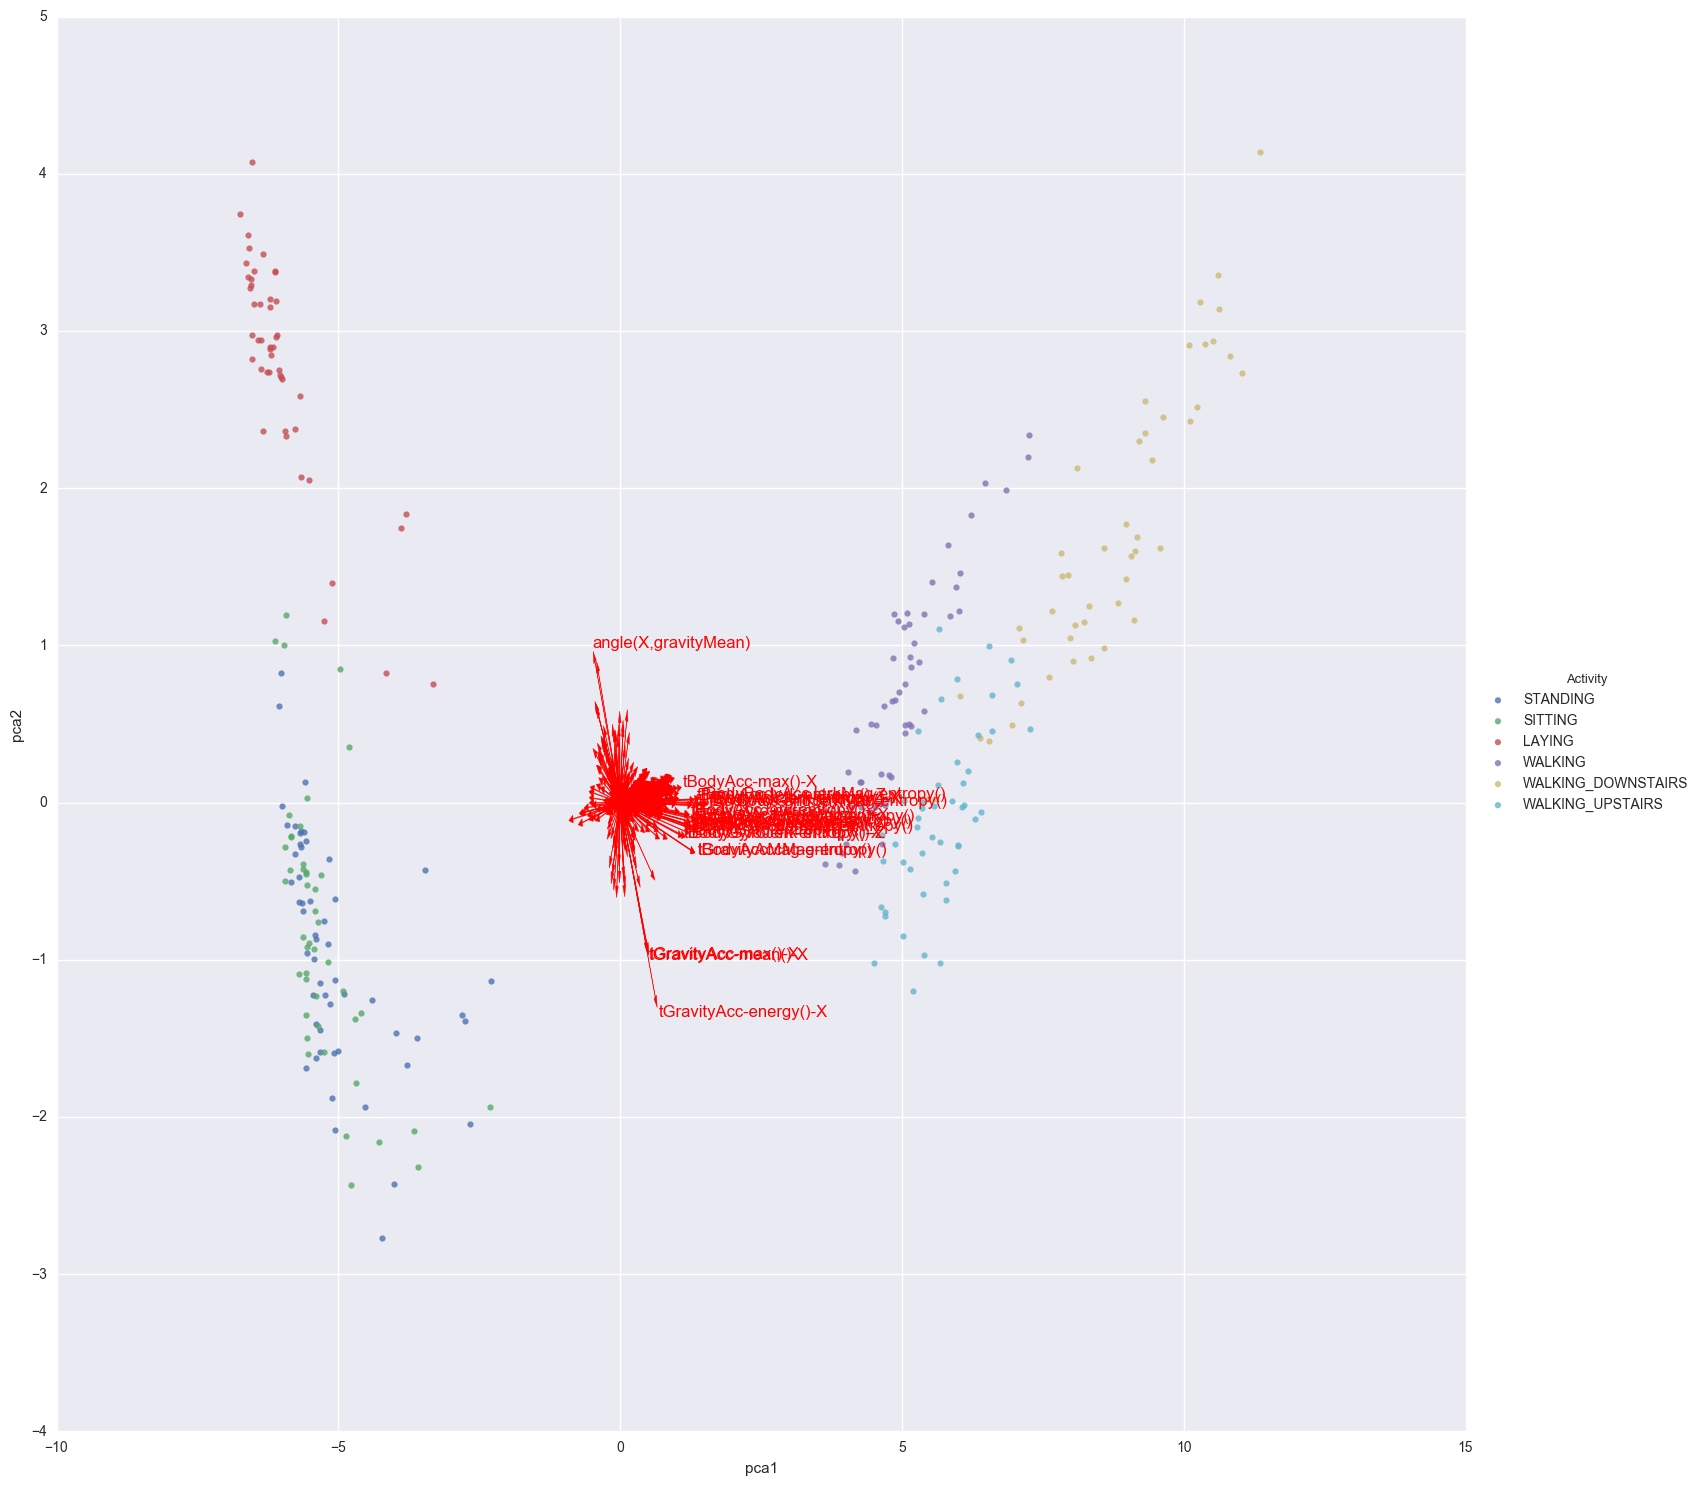

4
[ 31.14111906   2.47873505   1.72743078   0.93593229   0.80899598
   0.70283236   0.5781652    0.5407919    0.51551698   0.49221443]
[ 0.61641815  0.04906494  0.03419337  0.01852617  0.01601355  0.01391211
  0.0114444   0.01070462  0.01020432  0.00974306]
[ 0.61641815  0.66548309  0.69967646  0.71820263  0.73421617  0.74812828
  0.75957269  0.77027731  0.78048163  0.7902247 ]


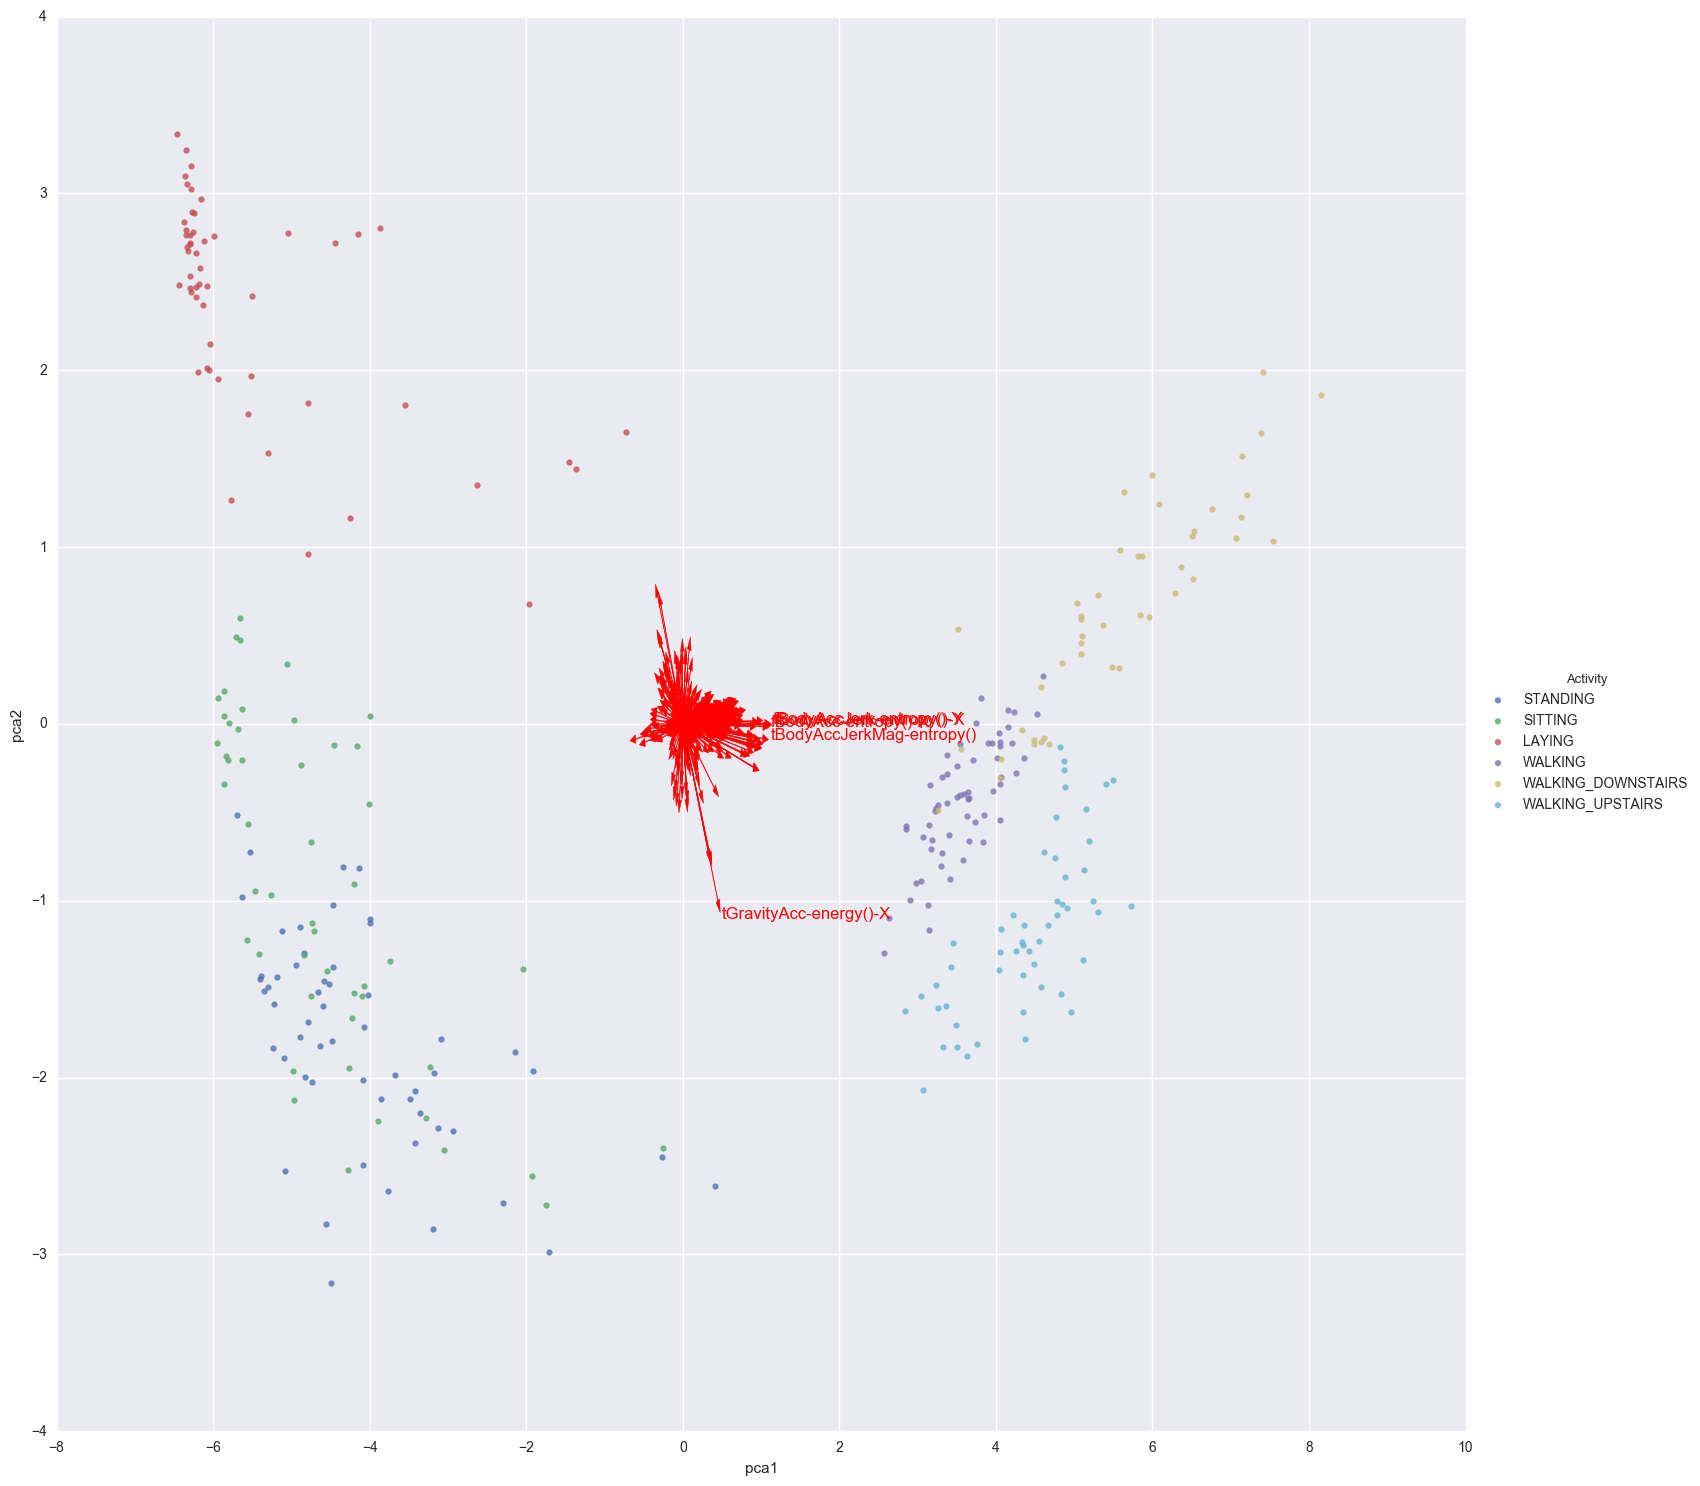

9
[ 31.14111906   2.47873505   1.72743078   0.93593229   0.80899598
   0.70283236   0.5781652    0.5407919    0.51551698   0.49221443]
[ 0.61641815  0.04906494  0.03419337  0.01852617  0.01601355  0.01391211
  0.0114444   0.01070462  0.01020432  0.00974306]
[ 0.61641815  0.66548309  0.69967646  0.71820263  0.73421617  0.74812828
  0.75957269  0.77027731  0.78048163  0.7902247 ]


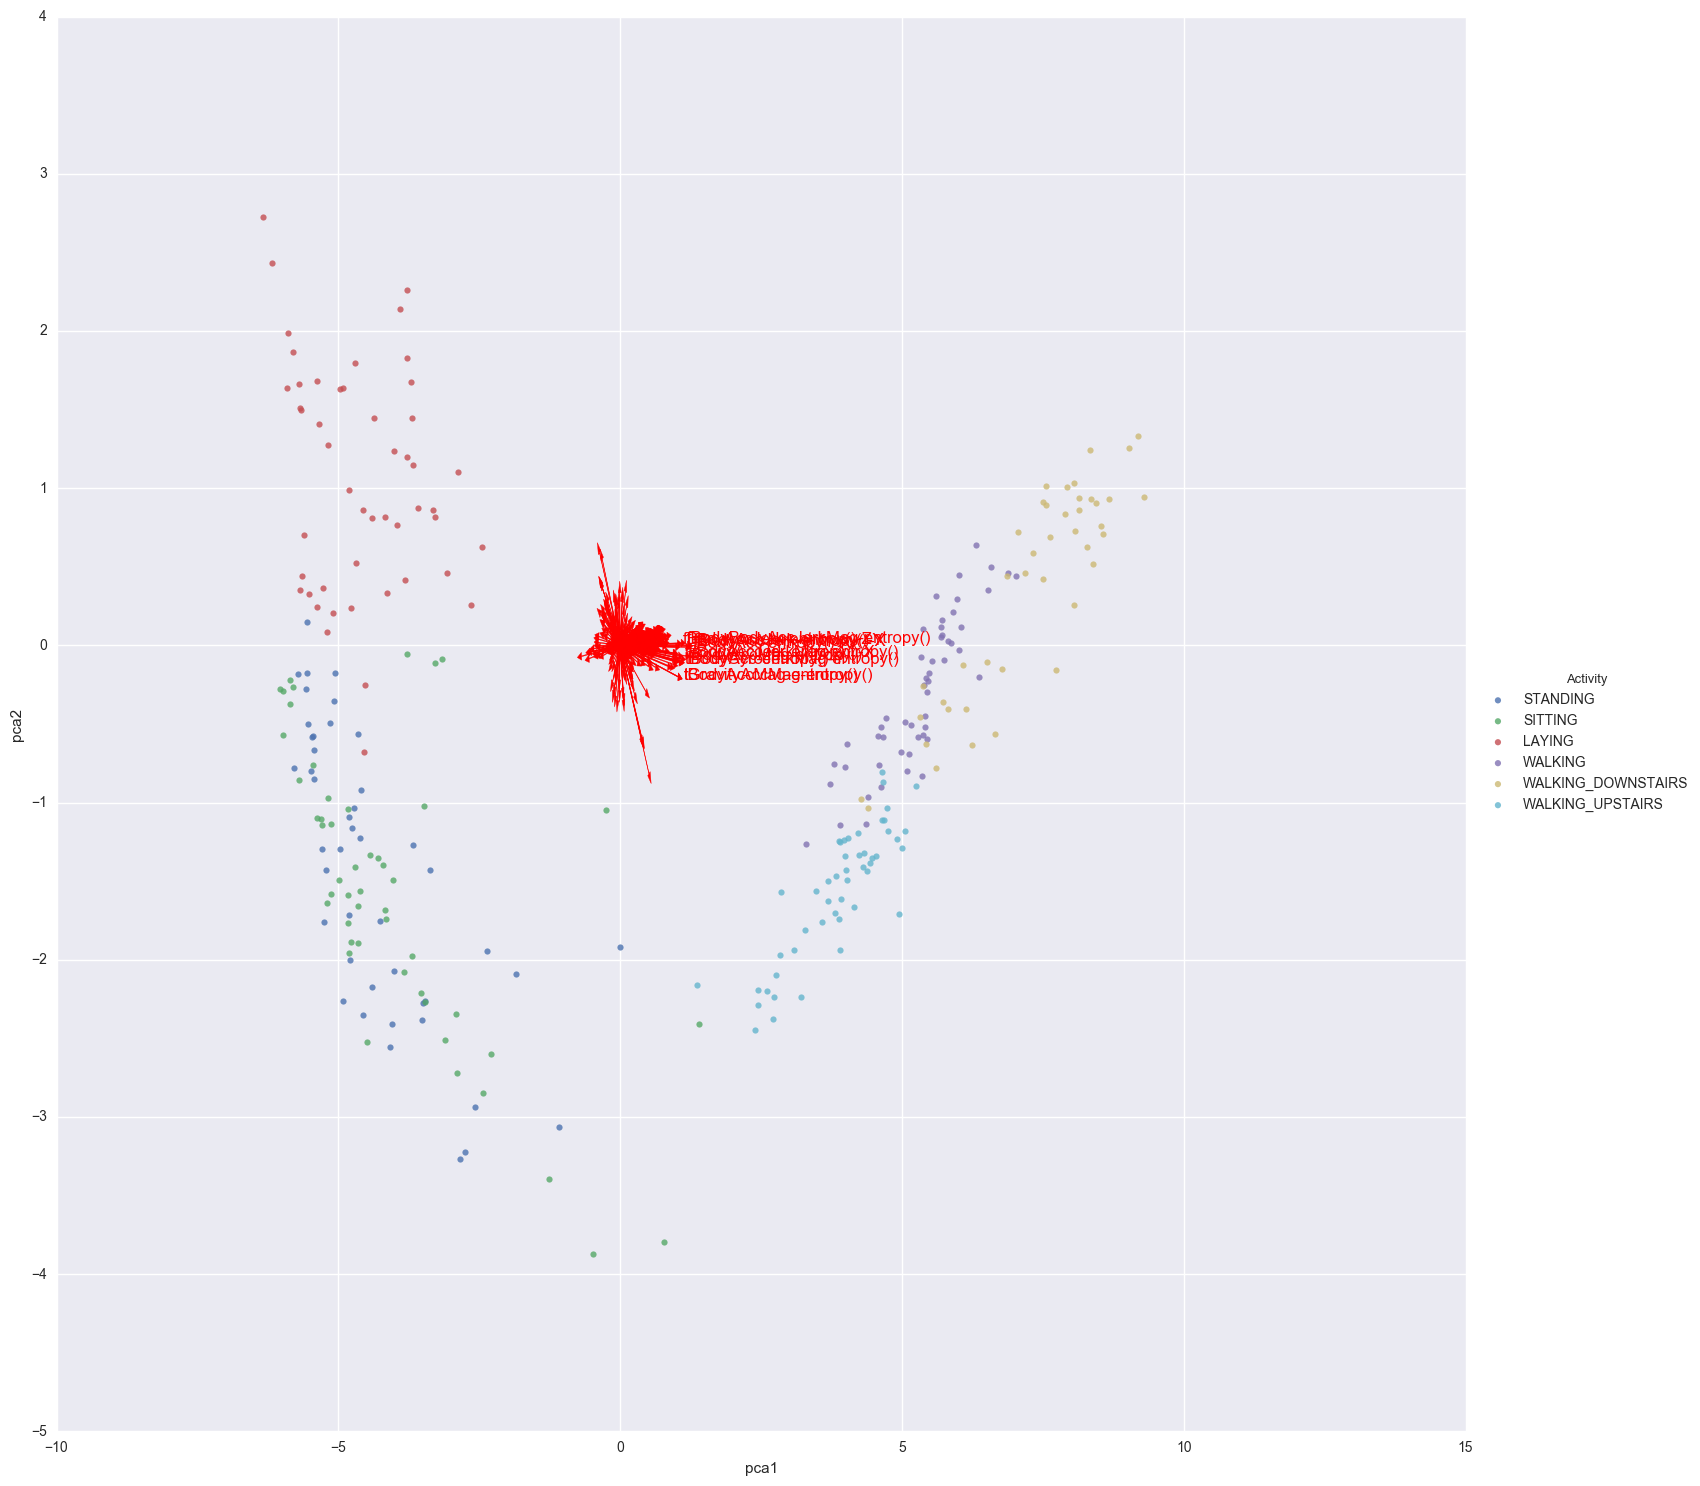

10
[ 31.14111906   2.47873505   1.72743078   0.93593229   0.80899598
   0.70283236   0.5781652    0.5407919    0.51551698   0.49221443]
[ 0.61641815  0.04906494  0.03419337  0.01852617  0.01601355  0.01391211
  0.0114444   0.01070462  0.01020432  0.00974306]
[ 0.61641815  0.66548309  0.69967646  0.71820263  0.73421617  0.74812828
  0.75957269  0.77027731  0.78048163  0.7902247 ]


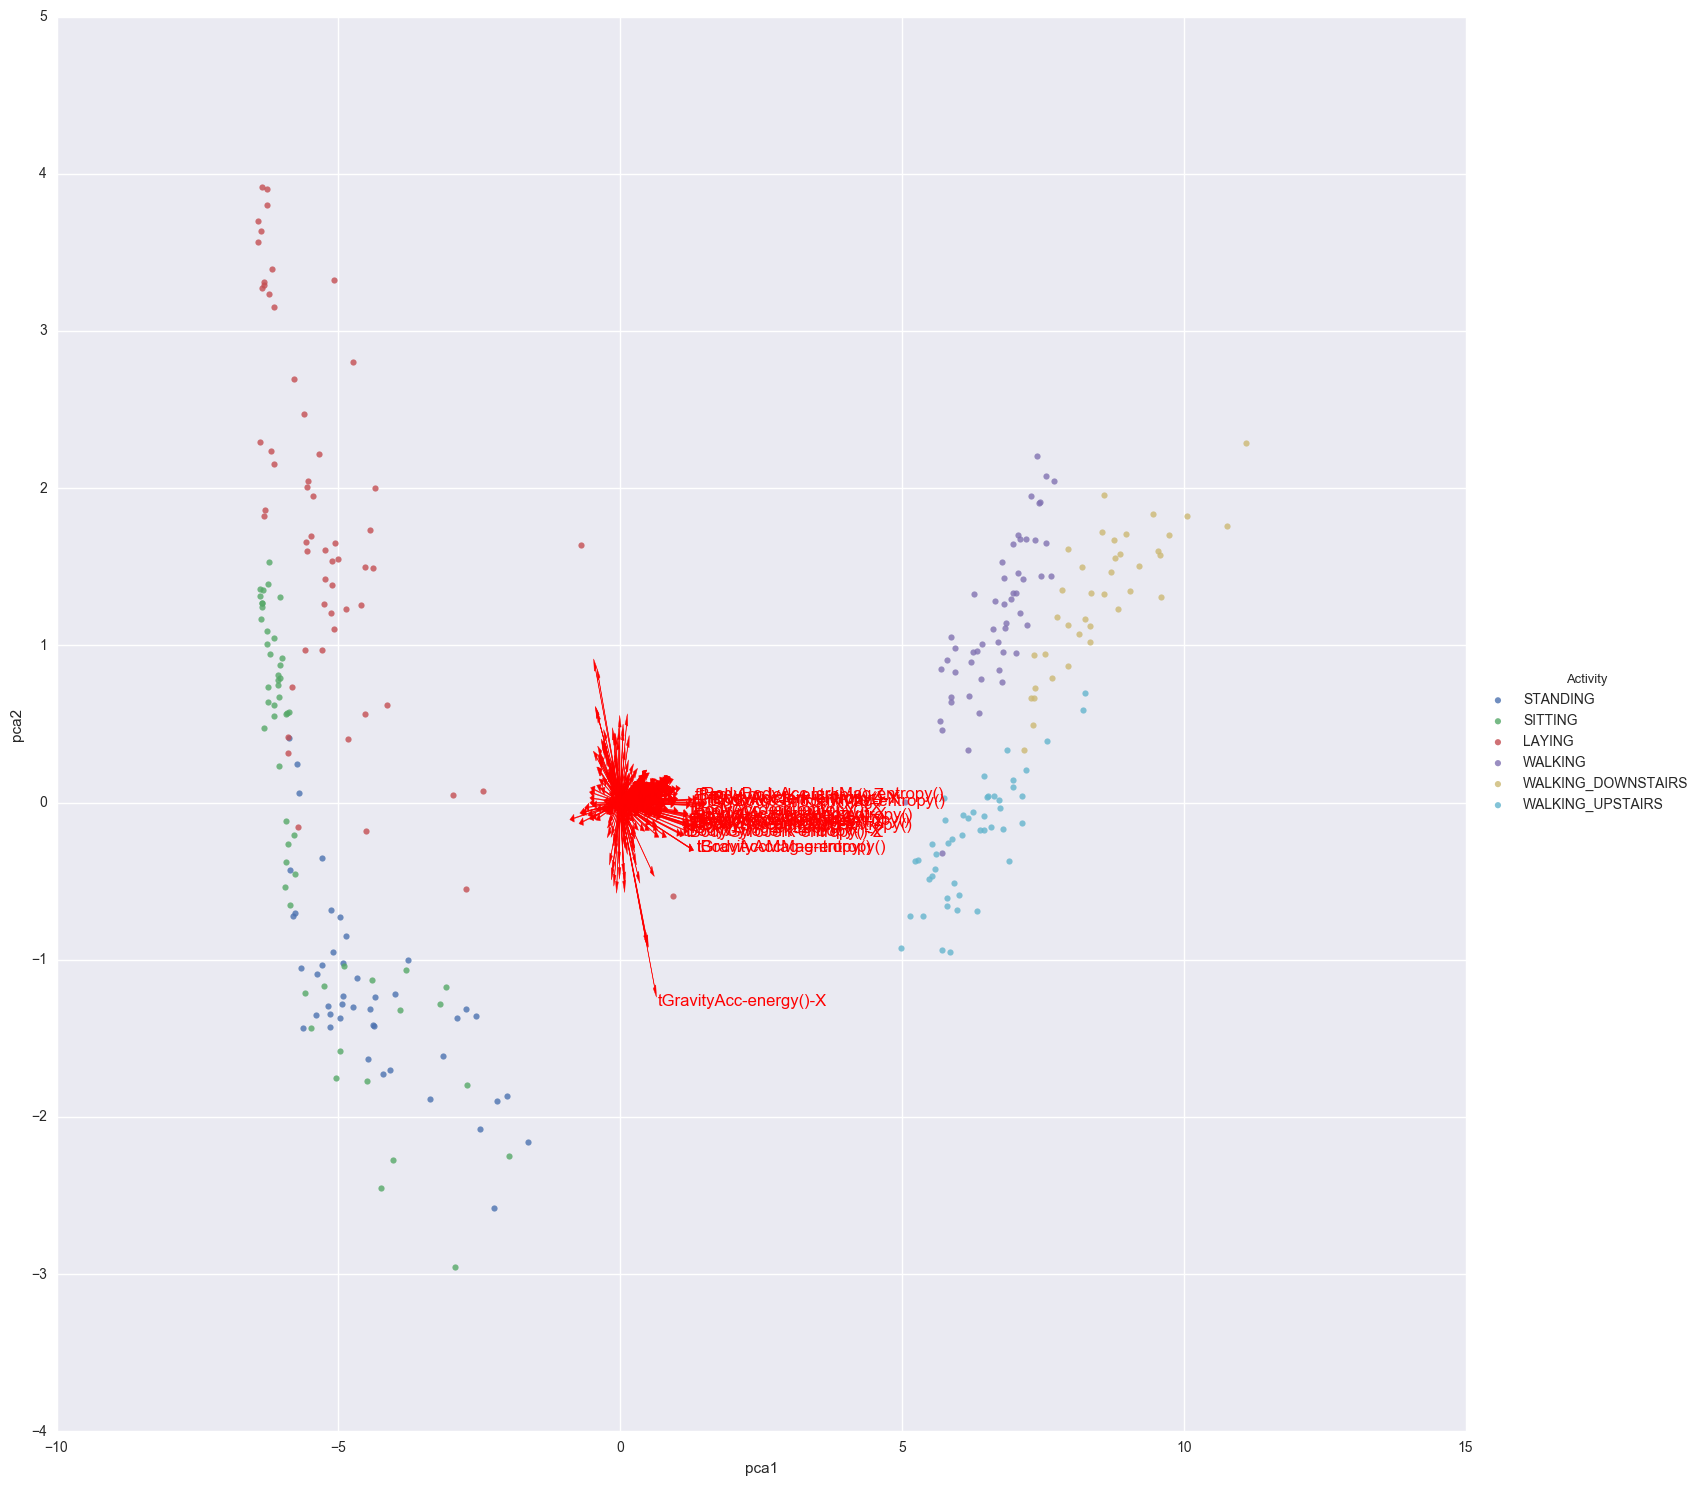

12
[ 31.14111906   2.47873505   1.72743078   0.93593229   0.80899598
   0.70283236   0.5781652    0.5407919    0.51551698   0.49221443]
[ 0.61641815  0.04906494  0.03419337  0.01852617  0.01601355  0.01391211
  0.0114444   0.01070462  0.01020432  0.00974306]
[ 0.61641815  0.66548309  0.69967646  0.71820263  0.73421617  0.74812828
  0.75957269  0.77027731  0.78048163  0.7902247 ]


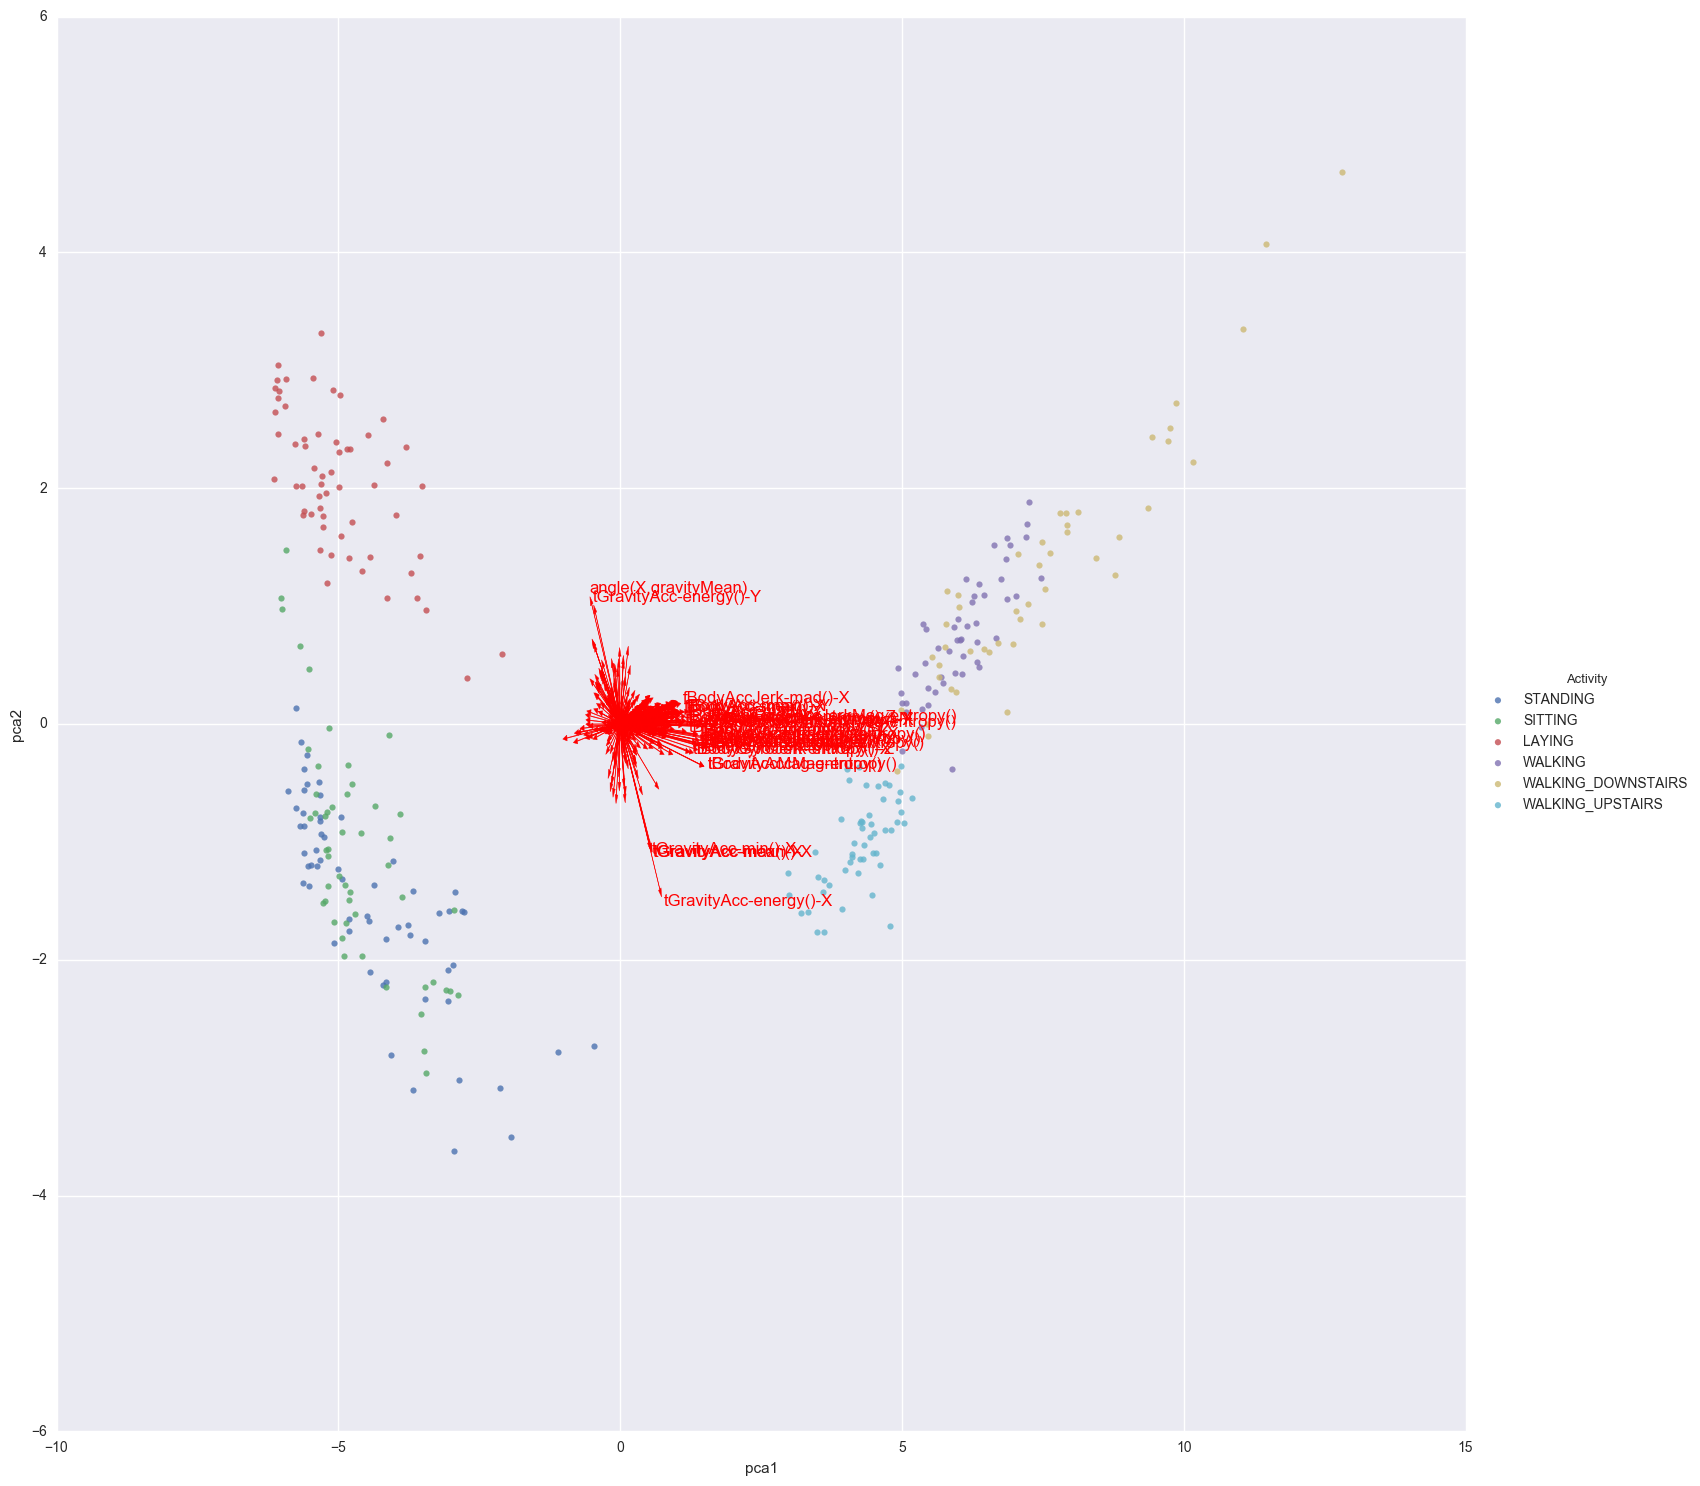

13
[ 31.14111906   2.47873505   1.72743078   0.93593229   0.80899598
   0.70283236   0.5781652    0.5407919    0.51551698   0.49221443]
[ 0.61641815  0.04906494  0.03419337  0.01852617  0.01601355  0.01391211
  0.0114444   0.01070462  0.01020432  0.00974306]
[ 0.61641815  0.66548309  0.69967646  0.71820263  0.73421617  0.74812828
  0.75957269  0.77027731  0.78048163  0.7902247 ]


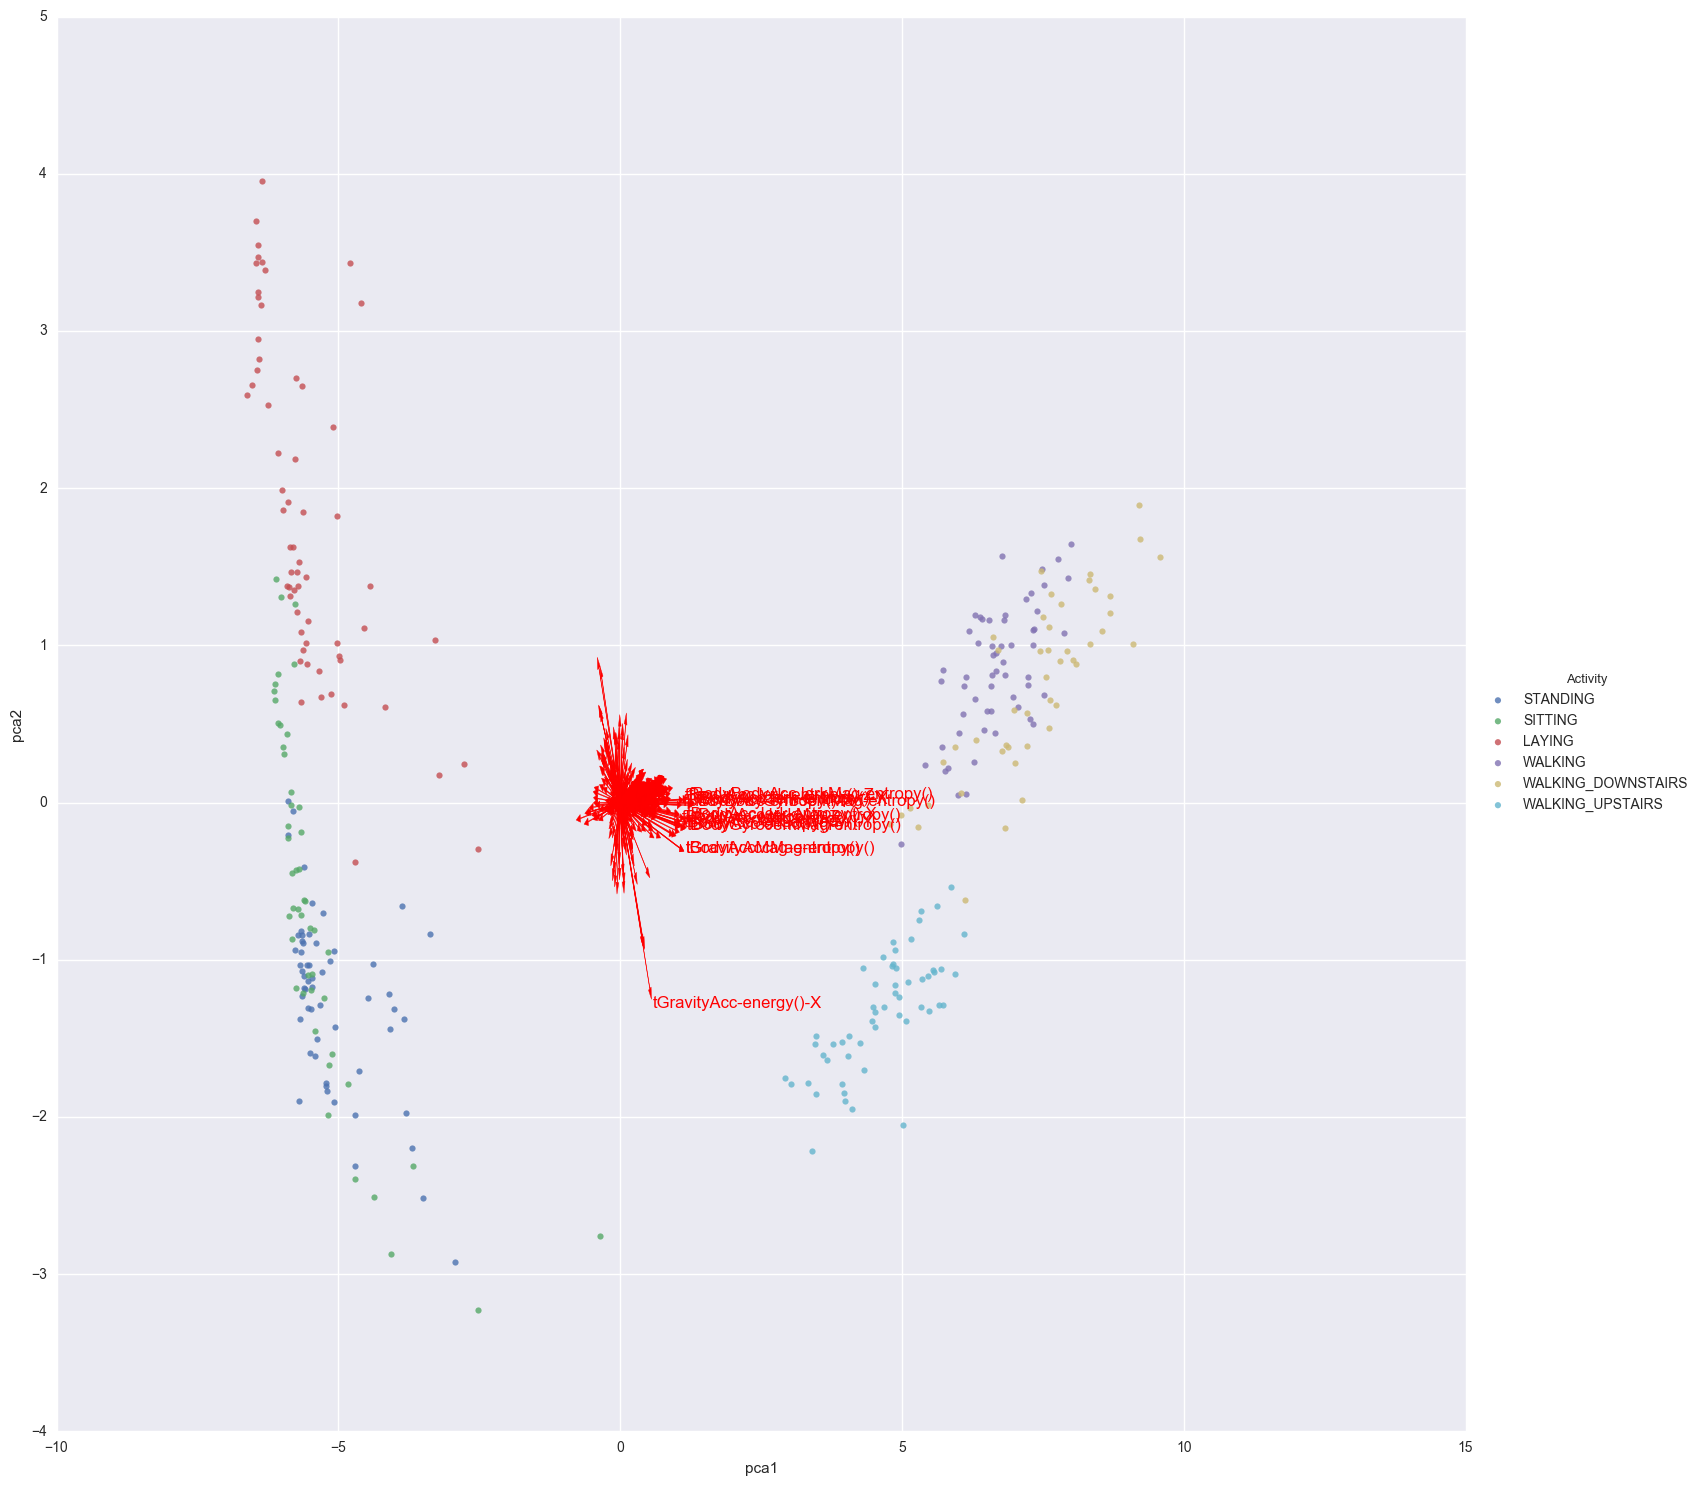

18
[ 31.14111906   2.47873505   1.72743078   0.93593229   0.80899598
   0.70283236   0.5781652    0.5407919    0.51551698   0.49221443]
[ 0.61641815  0.04906494  0.03419337  0.01852617  0.01601355  0.01391211
  0.0114444   0.01070462  0.01020432  0.00974306]
[ 0.61641815  0.66548309  0.69967646  0.71820263  0.73421617  0.74812828
  0.75957269  0.77027731  0.78048163  0.7902247 ]


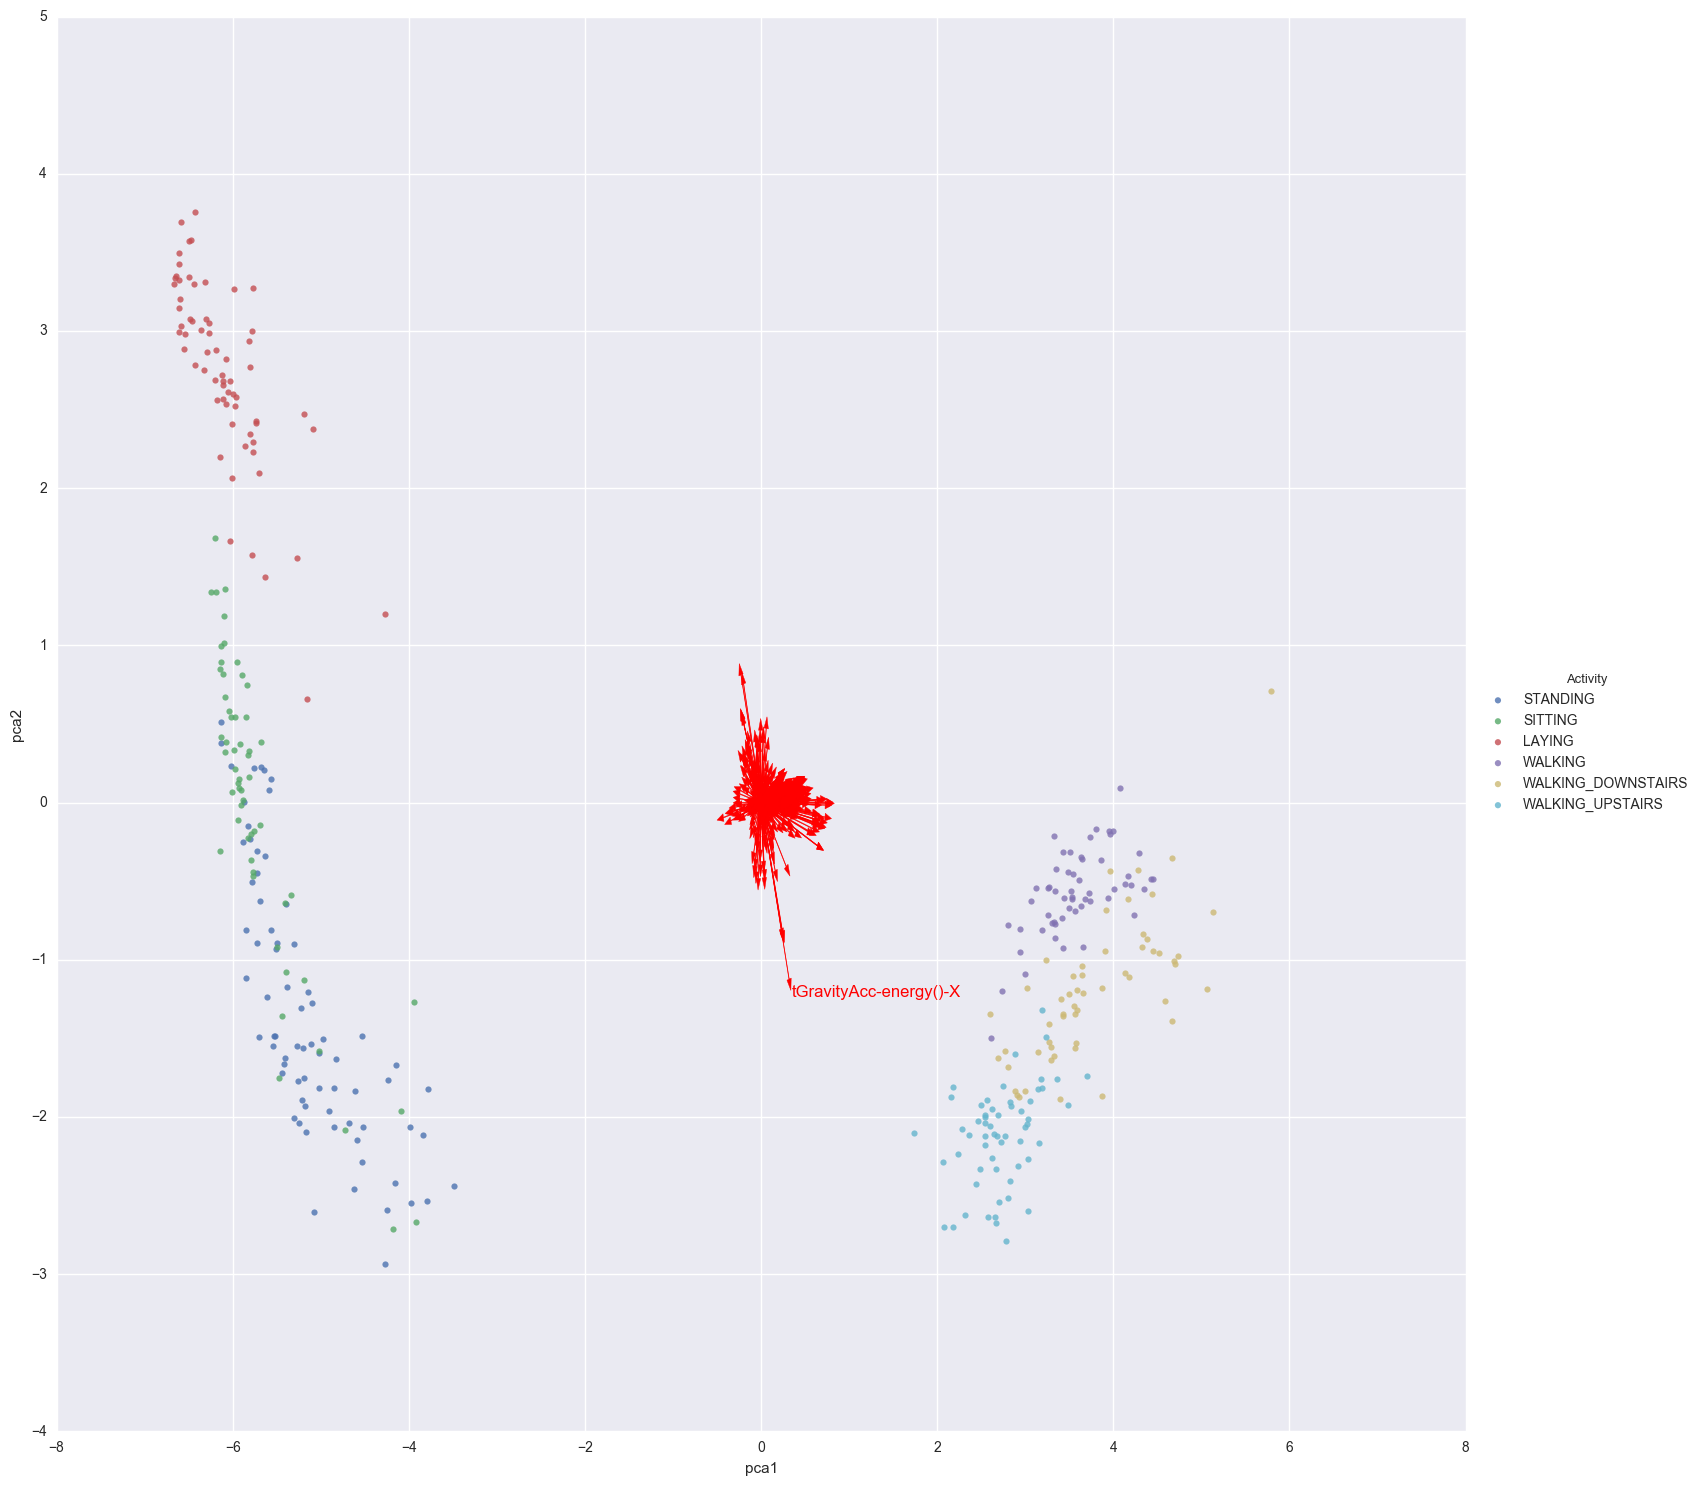

20
[ 31.14111906   2.47873505   1.72743078   0.93593229   0.80899598
   0.70283236   0.5781652    0.5407919    0.51551698   0.49221443]
[ 0.61641815  0.04906494  0.03419337  0.01852617  0.01601355  0.01391211
  0.0114444   0.01070462  0.01020432  0.00974306]
[ 0.61641815  0.66548309  0.69967646  0.71820263  0.73421617  0.74812828
  0.75957269  0.77027731  0.78048163  0.7902247 ]


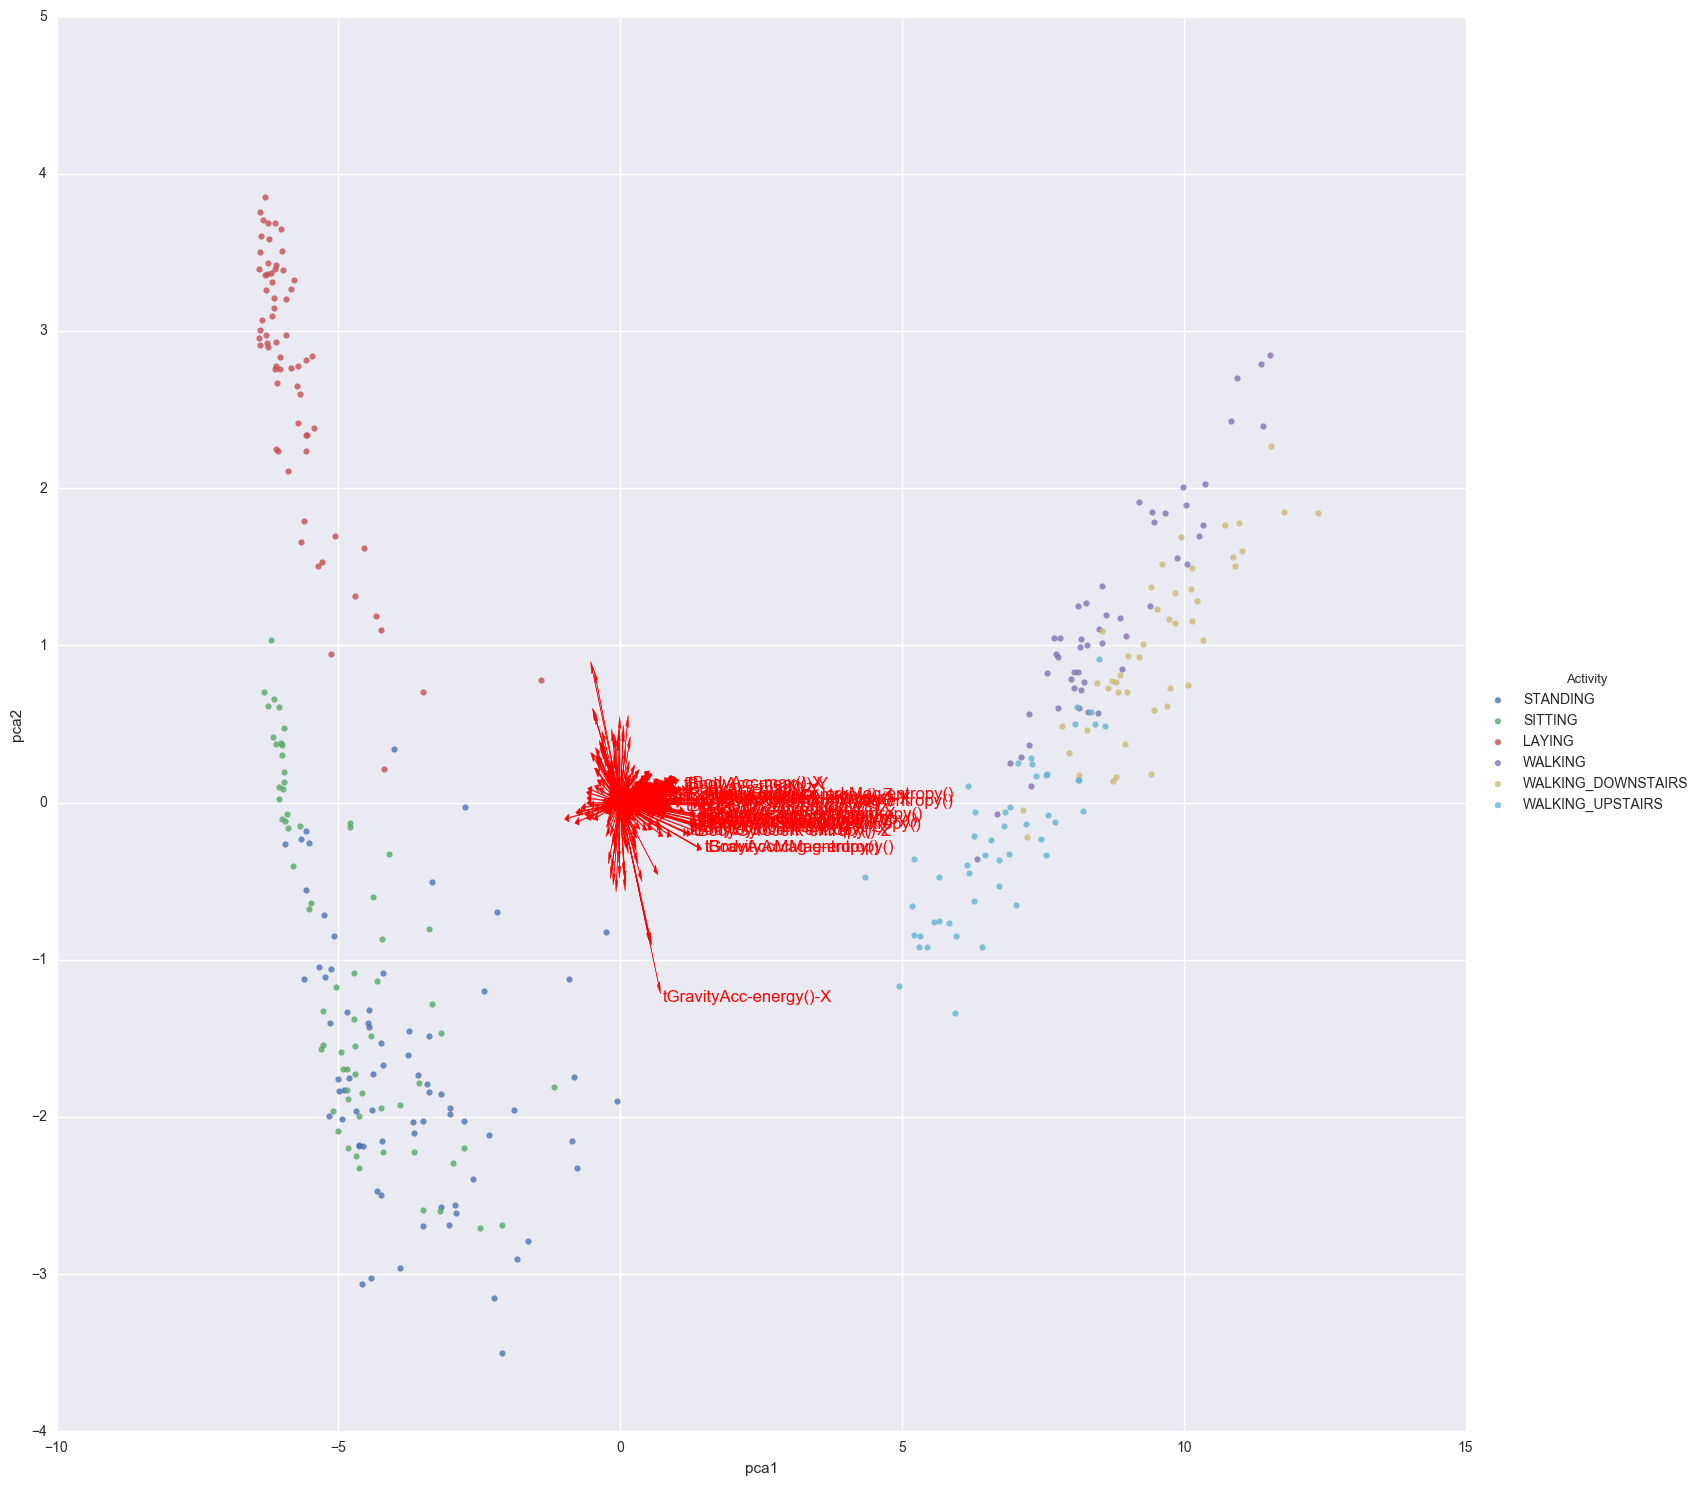

24
[ 31.14111906   2.47873505   1.72743078   0.93593229   0.80899598
   0.70283236   0.5781652    0.5407919    0.51551698   0.49221443]
[ 0.61641815  0.04906494  0.03419337  0.01852617  0.01601355  0.01391211
  0.0114444   0.01070462  0.01020432  0.00974306]
[ 0.61641815  0.66548309  0.69967646  0.71820263  0.73421617  0.74812828
  0.75957269  0.77027731  0.78048163  0.7902247 ]


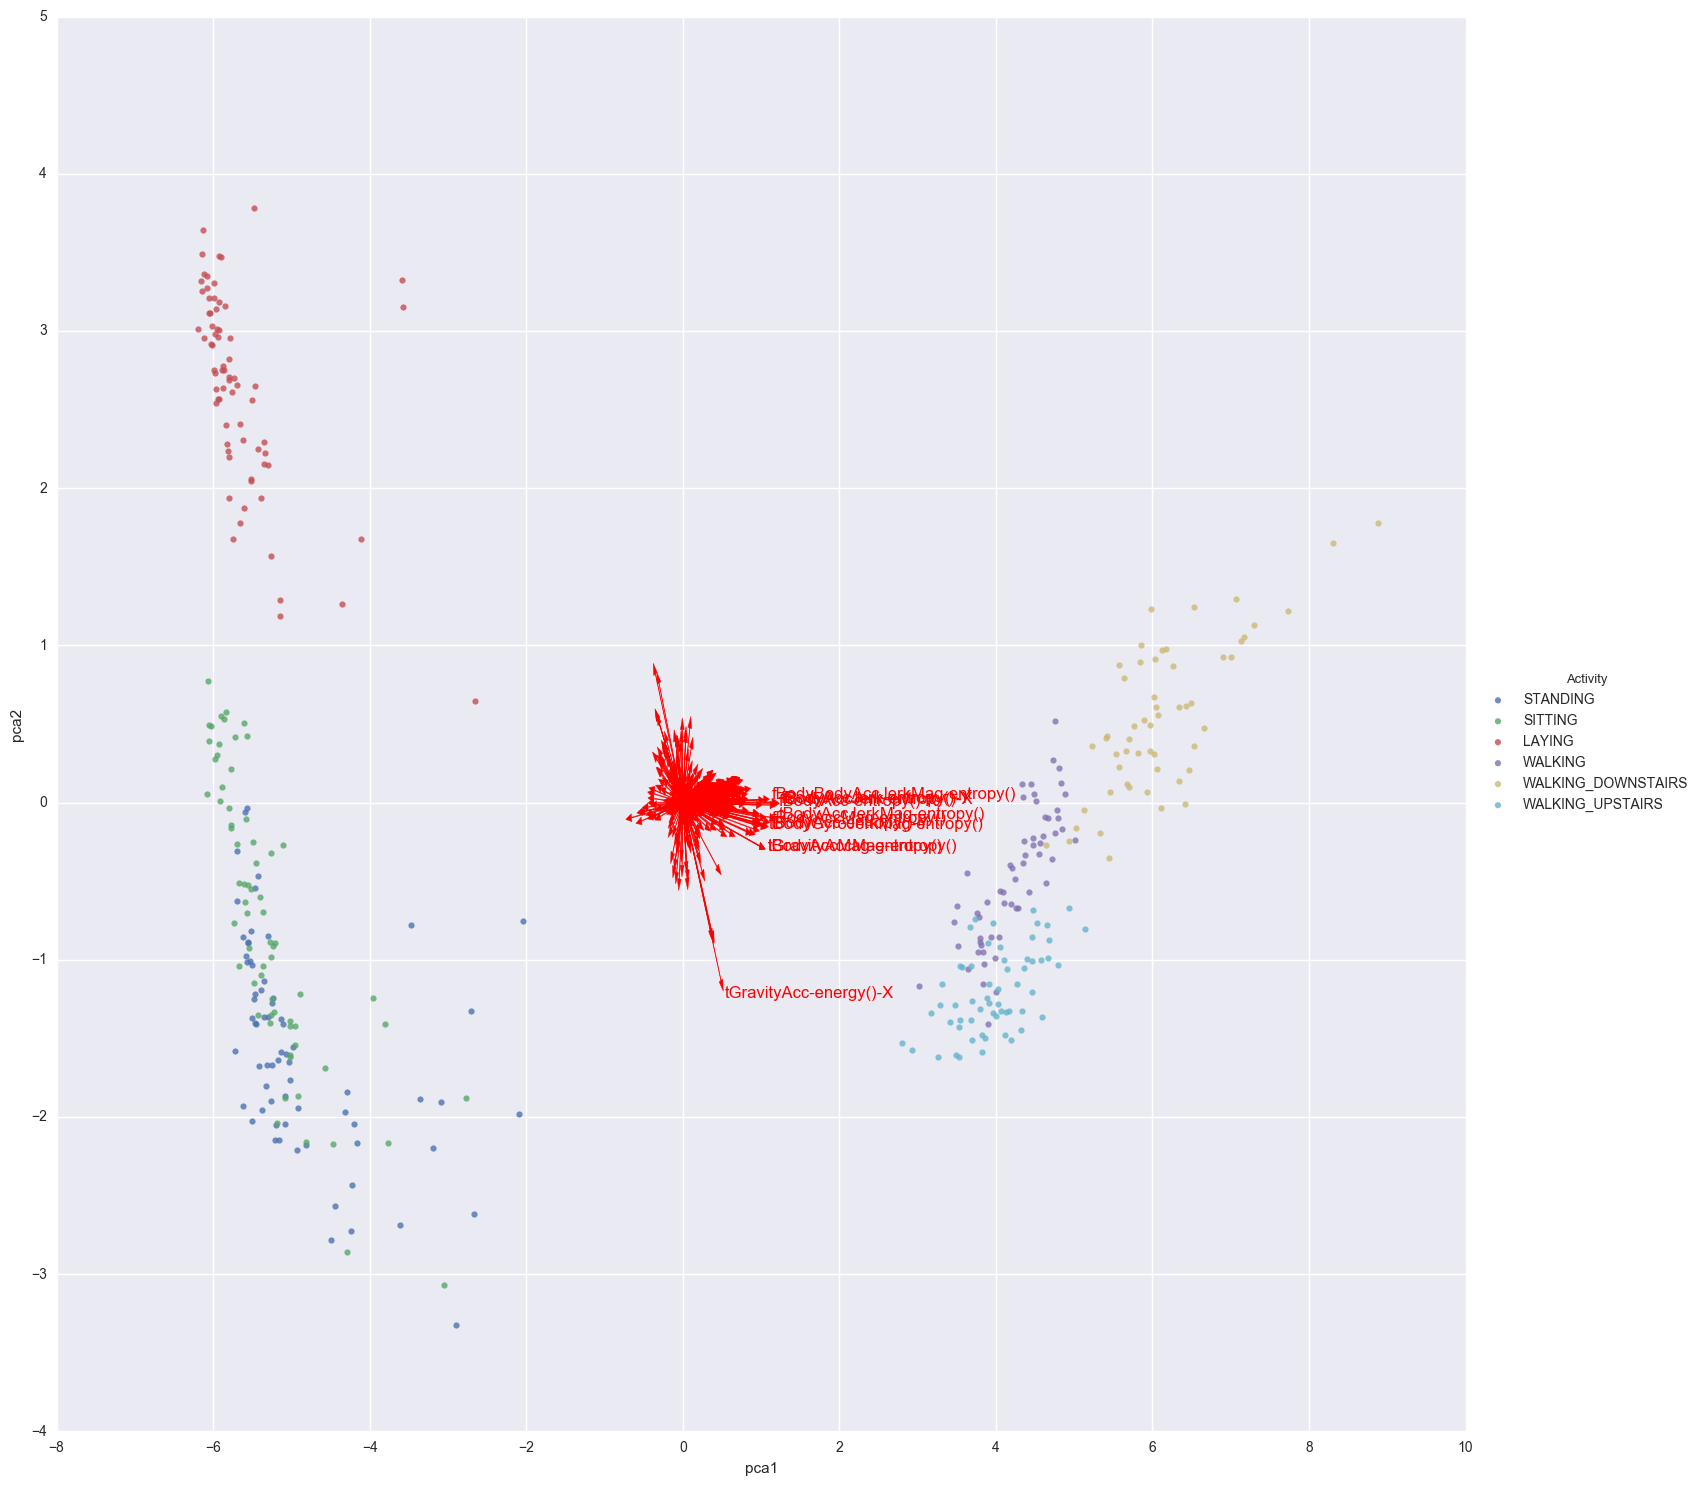

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
import seaborn as sns

def biplot(pca, X_pca, classColumn):
    g = sns.lmplot('pca1', 'pca2', data=X_pca, fit_reg = False, hue = classColumn, size=15)

    xvector = pca.components_[0]
    yvector = pca.components_[1]
 
    xs = pca.transform(dataP)[:,0]
    ys = pca.transform(dataP)[:,1]
 
    for i in range(len(xvector)):
        plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.05)
        if (xvector[i]*max(xs)) ** 2 + (yvector[i]*max(ys)) ** 2 > 1:
            plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
                list(dataP.columns.values)[i], color='r')
    plt.show()
        
grouped = data.groupby('subject')
pca = PCA(10)  
dataP = data.drop(['Activity','subject'], axis=1)
pca.fit(dataP)

for name, s in grouped:
    print(name)
    dataP = s.drop(['Activity','subject'], axis=1)
    X_pca_tmp = pd.DataFrame.from_records(pca.transform(dataP))
    X_pca = pd.DataFrame()
    X_pca['Activity'] = s['Activity']
    #without tolist not copy to pca columns, its a bug
    X_pca['pca1'] = X_pca_tmp.ix[:,0].tolist()
    X_pca['pca2'] = X_pca_tmp.ix[:,1].tolist()
    print(pca.explained_variance_)
    print(pca.explained_variance_ratio_)
    print(pca.explained_variance_ratio_.cumsum())
    biplot(pca, X_pca, 'Activity')
    

[ 31.14111906   2.47873505   1.72743078   0.93593229   0.80899598
   0.70283236   0.57816526   0.54079167   0.51551539   0.49221532]
[ 0.61641815  0.04906494  0.03419337  0.01852617  0.01601355  0.01391211
  0.0114444   0.01070462  0.01020429  0.00974308]
[ 0.61641815  0.66548309  0.69967646  0.71820263  0.73421617  0.74812828
  0.75957269  0.77027731  0.7804816   0.79022468]


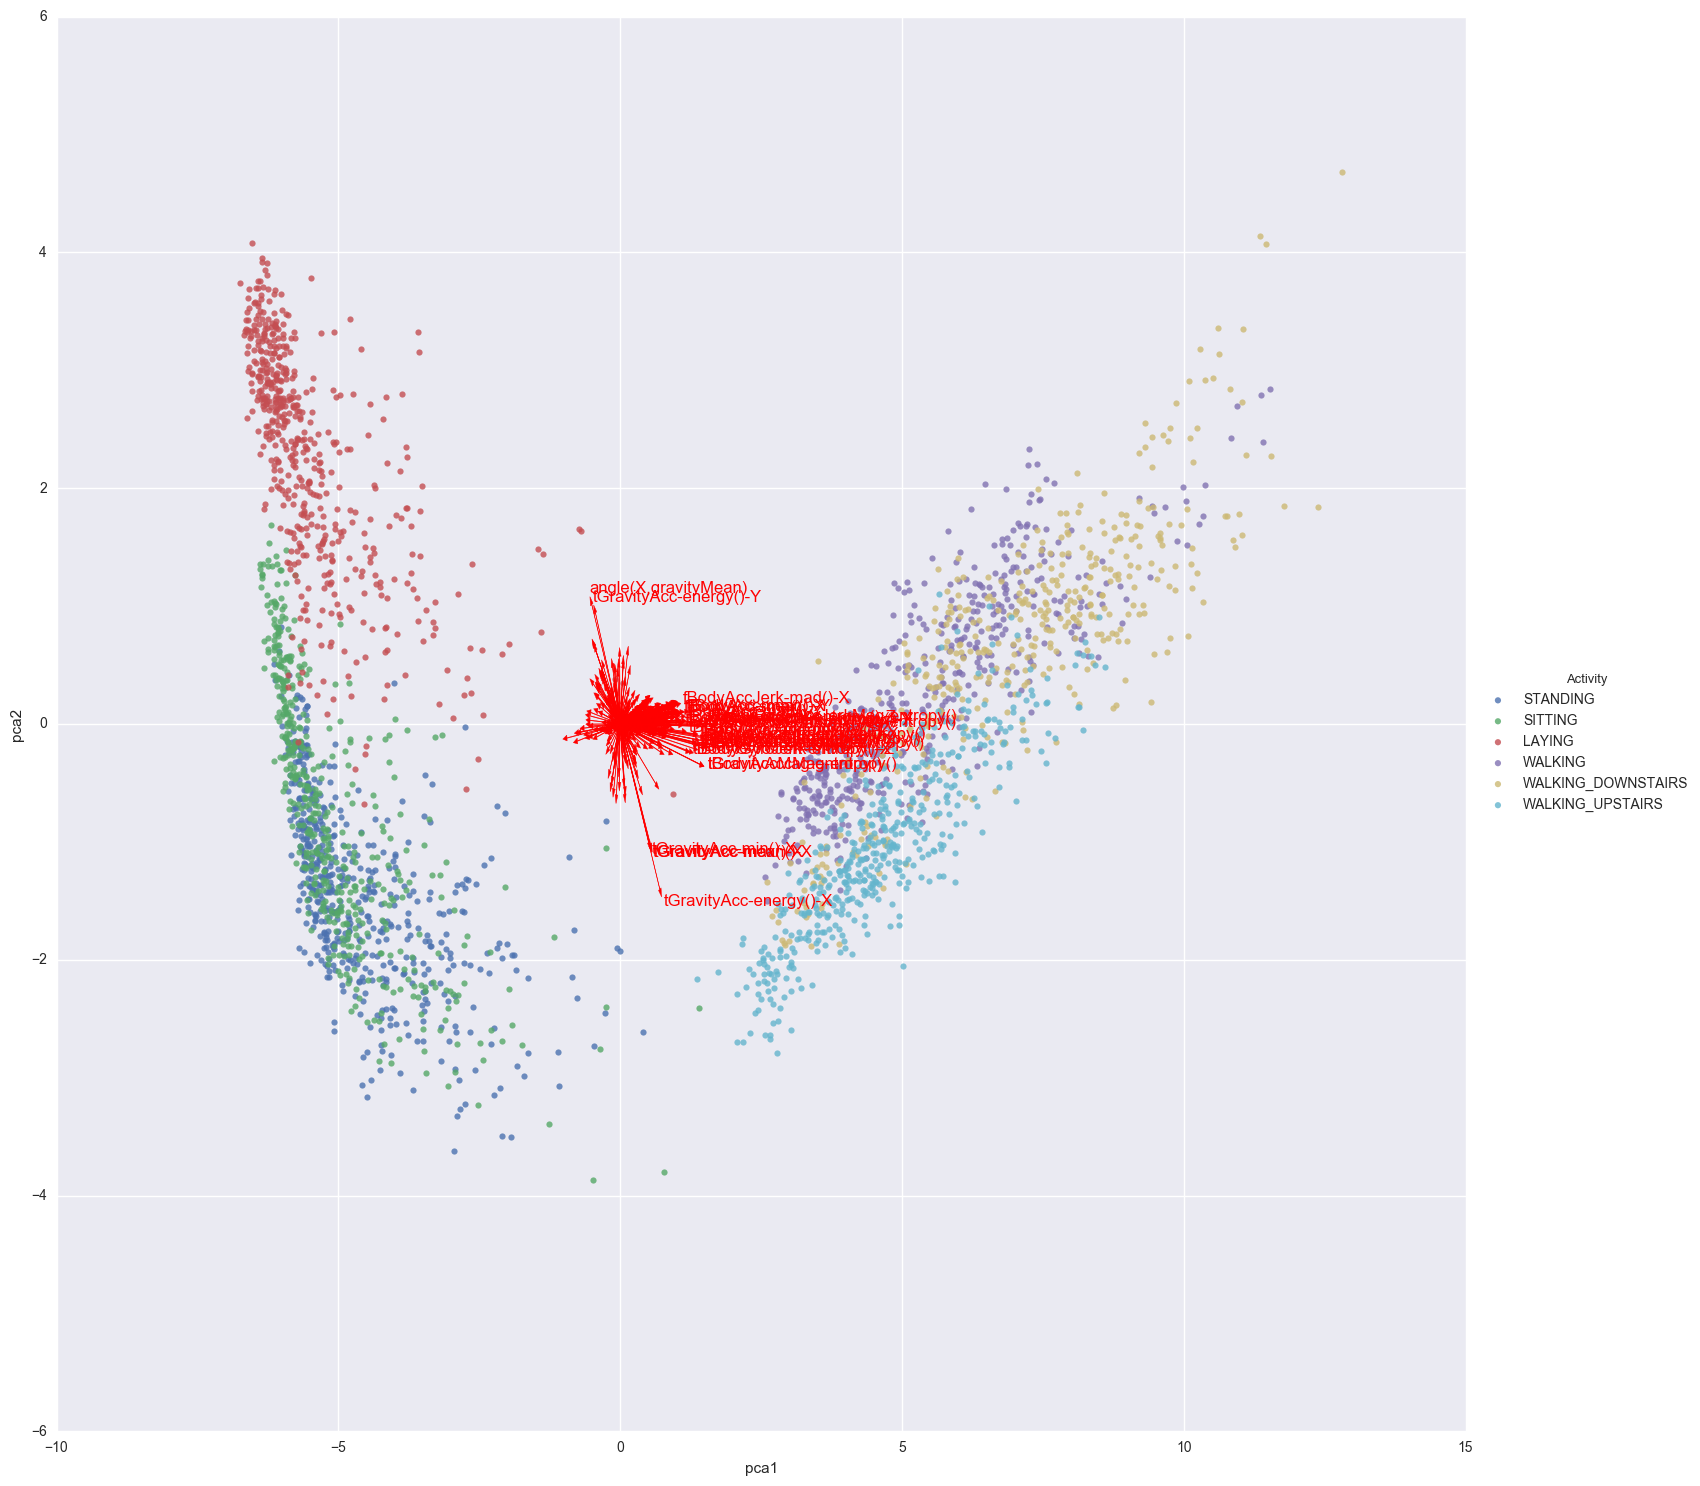

In [32]:
pca = PCA(10)  
dataP = data.drop(['Activity','subject'], axis=1)
X_pca_tmp = pd.DataFrame.from_records(pca.fit_transform(dataP))
X_pca = pd.DataFrame()
X_pca['Activity'] = data['Activity']
#without tolist not copy to pca columns, its a bug
X_pca['pca1'] = X_pca_tmp.ix[:,0].tolist()
X_pca['pca2'] = X_pca_tmp.ix[:,1].tolist()
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
biplot(pca, X_pca, 'Activity')

Из диаграмм рассеяния видно, что деятельность можно разделить на 2 вида: активную и пассивную. К активной деятельности относятся все виды ходьбы, к пассивной - все остальное. Структура этих категорий сильно зависит от конкретного испытуемого. В категории пассивной деятельности заметно выделяется лежание. Остальные виды деятельности отделить друг от друга в 2-х мерном пространстве не получится.

Из диаграмм видно, что многие признаки сильно коррелируют друг с другом и несколько признаков сильно коррелируют с зависимой переменной. В будущем можно провести отбор признаков. На диаграмме также видно, что признаки tGravityAcc-entropy()-X и fBodyAccJerk-entropy()-X несут больше всего информации, рассмотрим их.

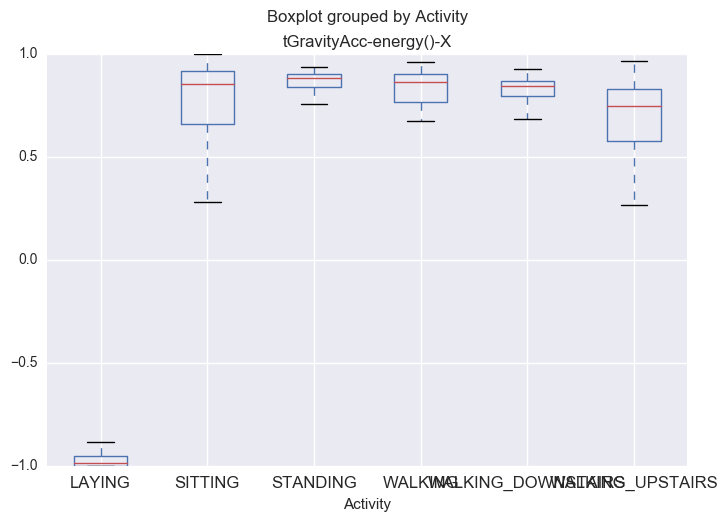

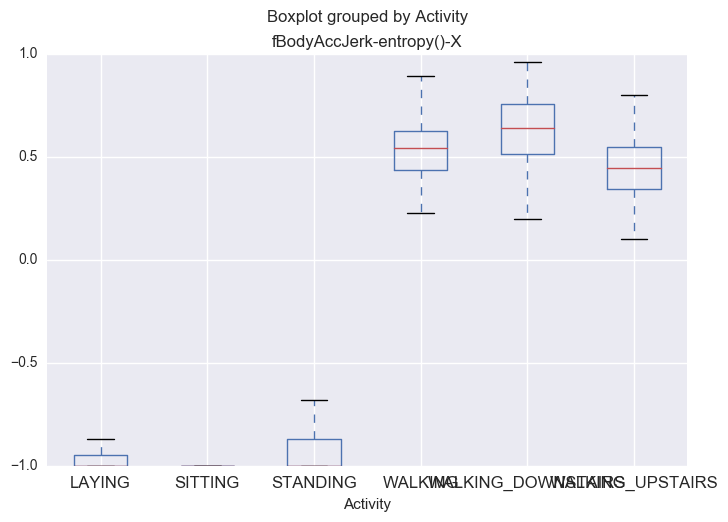

In [35]:
data.boxplot(by='Activity', column='tGravityAcc-energy()-X')
data.boxplot(by='Activity', column='fBodyAccJerk-entropy()-X')

Видно, что tGravityAcc-energy()-X коррелирует с лежанием. Активная и пассивная деятельность коррелирует с fBodyAccJerk-entropy()-X. 

## Вывод

Стоит задача многоклассовой классификации. Данные высокой размерности, предикторы сильно коррелируют. Неоторые предикторы сильно коррелируют с зависимой переменной. В дальнейшем необходимо провести отбор значемых признаков и построить классификатор.